# Presenting Data in Tables and Charts

In [157]:
import pandas as pd
from pyreadr import read_r

## 1) Water Quality

In [158]:
df = pd.DataFrame(['A', 'B', 'C', 'D', 'F']).sample(30, replace=True)
df.describe()

,0
count,30
unique,5
top,A
freq,8


In [159]:
abs = df.value_counts()
abs

A    8
F    8
D    6
B    4
C    4
dtype: int64

In [160]:
rel = df.value_counts(normalize=True)
rel

A    0.266667
F    0.266667
D    0.200000
B    0.133333
C    0.133333
dtype: float64

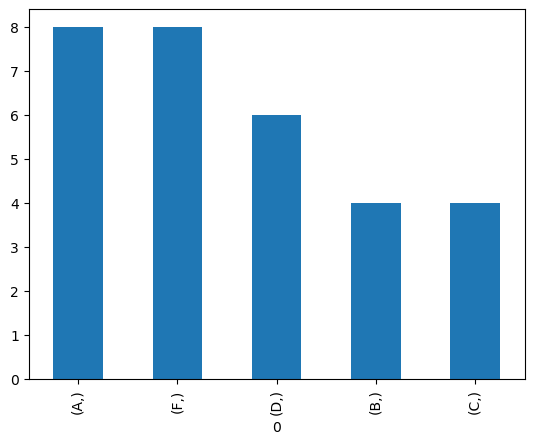

In [161]:
abs.plot.bar(); None # <-- suppress output in Jupyter notebook

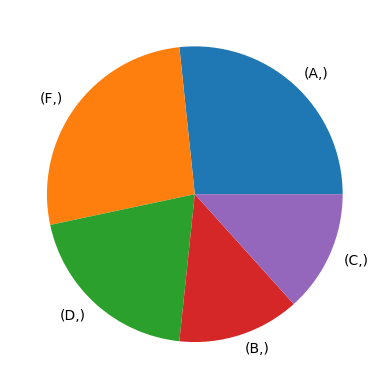

In [162]:
rel.plot.pie(); None # <-- suppress output in Jupyter notebook

## 2) Design Specifications

(quantitative and discrete variable)

Temperature transducers of a certain type are shipped in batches of 50.
A sample of 60 batches was selected, and the number of transducers in each batch not conforming to design specifications was determined, resulting in the following data.
(Data: ex01.17)

In [163]:
data = read_r('../data/devore7/ex01.17.rda')
df = data['ex01.17']
df.describe()

,C1
count,60.000000
mean,2.533333
std,1.826979
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,8.000000


### a.

Determine absolute frequencies and relative frequencies for the observed values of x = number of nonconforming transducers in a batch.

In [164]:
freq = pd.DataFrame({
    'abs': df['C1'].value_counts(),
    'rel': df['C1'].value_counts(normalize=True)
}).sort_index()
freq

,abs,rel
0,7,0.116667
1,12,0.200000
2,13,0.216667
3,14,0.233333
4,6,0.100000
5,3,0.050000
6,3,0.050000
7,1,0.016667
8,1,0.016667


### b.

* What proportion of batches in the sample have at most five nonconforming transducers?
* What proportion have fewer than five?
* What proportion have at least five nonconforming units?

In [165]:
freq['abs_cumsum'] = freq['abs'].cumsum()
freq['rel_cumsum'] = freq['rel'].cumsum()
freq

,abs,rel,abs_cumsum,rel_cumsum
0,7,0.116667,7,0.116667
1,12,0.200000,19,0.316667
2,13,0.216667,32,0.533333
3,14,0.233333,46,0.766667
4,6,0.100000,52,0.866667
5,3,0.050000,55,0.916667
6,3,0.050000,58,0.966667
7,1,0.016667,59,0.983333
8,1,0.016667,60,1.000000


### b. (cont.)

In [166]:
freq

,abs,rel,abs_cumsum,rel_cumsum
0,7,0.116667,7,0.116667
1,12,0.200000,19,0.316667
2,13,0.216667,32,0.533333
3,14,0.233333,46,0.766667
4,6,0.100000,52,0.866667
5,3,0.050000,55,0.916667
6,3,0.050000,58,0.966667
7,1,0.016667,59,0.983333
8,1,0.016667,60,1.000000


In [167]:
at_most_five = freq.iloc[5, 3]
less_than_five = freq.iloc[4, 3]
at_least_five = 1 - freq.iloc[4, 3]

print(at_most_five, less_than_five, at_least_five)

0.9166666666666666 0.8666666666666666 0.13333333333333341


### c.

Draw a bar plot of the data using relative frequency on the vertical scale, and comment on its features.

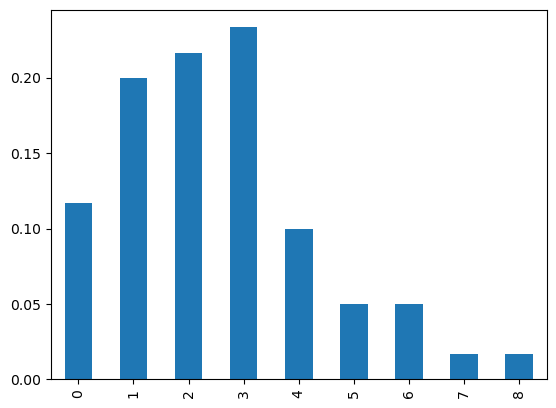

In [168]:
freq['rel'].plot.bar(); None # <-- suppress output in Jupyter notebook

### d.

Draw a pie chart of the data.

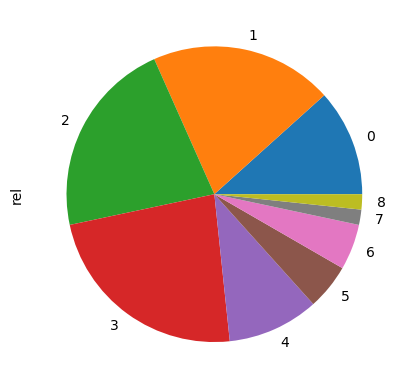

In [169]:
freq['rel'].plot.pie(); None # <-- suppress output in Jupyter notebook

### e.

Determine absolute cumulative frequencies and relative cumulative frequencies.

Solution: See b.

### f.

Plot the empirical cumulative distribution function.

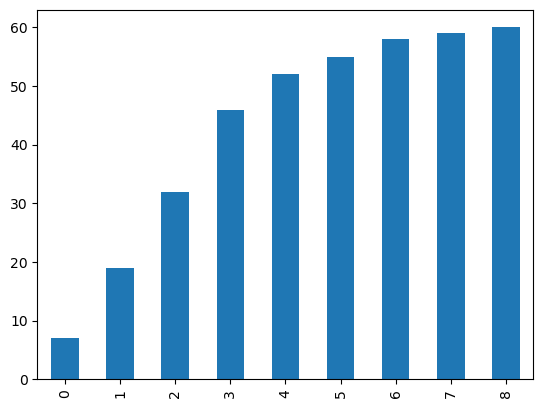

In [170]:
freq['abs_cumsum'].plot.bar(); None # <-- suppress output in Jupyter notebook

## 3) Tensile Ultimate Strength (quantitative and continuous variable)

Allowable mechanical properties for structural design of metallic aerospace vehicles requires an approved method for statistically analyzing empirical test data. The article “Establishing Mechanical Property Allowables for Metals” (J. of Testing and Evaluation, 1998: 293–299) used the accompanying data on tensile ultimate strength (ksi) as a basis for addressing the difficulties in developing such a method. (Data: ex01.13)

In [171]:
data = read_r('../data/devore7/ex01.13.rda')
df = data['ex01.13']
df.describe()

,strength
count,153.000000
mean,134.901961
std,4.541859
min,122.000000
25%,133.000000
50%,135.000000
75%,138.000000
max,147.000000


### a.

Construct a histogram using equal-width classes with the first class having a lower limit of 122 and an upper limit of 126 (7 class intervals from 122 to 150).
Then comment on any interesting features of the histogram.

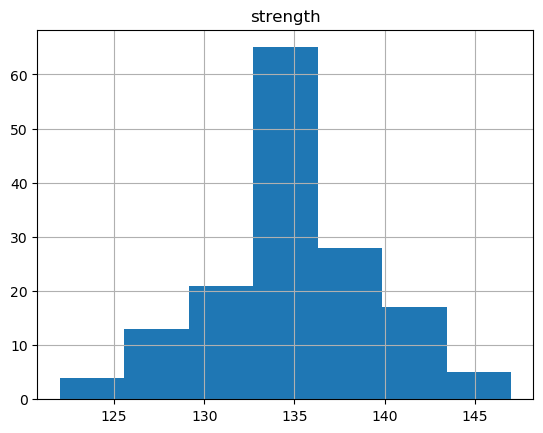

In [172]:
df.hist(bins=7); None # <-- suppress output in Jupyter notebook

### b.

Determine absolute frequencies and relative frequencies.

In [173]:
freq = pd.DataFrame({
    'abs': df['strength'].value_counts(bins=7),
    'rel': df['strength'].value_counts(bins=7, normalize=True)
}).sort_index()
freq

,abs,rel
"(121.97399999999999, 125.571]",4,0.026144
"(125.571, 129.143]",13,0.084967
"(129.143, 132.714]",21,0.137255
"(132.714, 136.286]",65,0.424837
"(136.286, 139.857]",28,0.183007
"(139.857, 143.429]",17,0.111111
"(143.429, 147.0]",5,0.032680


### c.

Determine absolute cumulative frequencies and relative cumulative frequencies.

In [174]:
freq['abs_cumsum'] = freq['abs'].cumsum()
freq['rel_cumsum'] = freq['rel'].cumsum()
freq

,abs,rel,abs_cumsum,rel_cumsum
"(121.97399999999999, 125.571]",4,0.026144,4,0.026144
"(125.571, 129.143]",13,0.084967,17,0.111111
"(129.143, 132.714]",21,0.137255,38,0.248366
"(132.714, 136.286]",65,0.424837,103,0.673203
"(136.286, 139.857]",28,0.183007,131,0.856209
"(139.857, 143.429]",17,0.111111,148,0.967320
"(143.429, 147.0]",5,0.032680,153,1.000000


### d.

Plot the empirical cumulative distribution function.

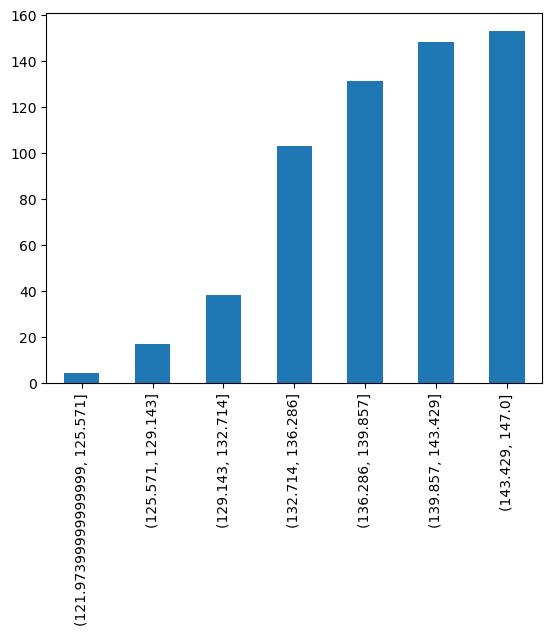

In [175]:
freq['abs_cumsum'].plot.bar(); None # <-- suppress output in Jupyter notebook

## 4) Plastic Rebars

Corrosion of reinforcing steel is a serious problem in concrete structures located in environments affected by severe weather conditions.
For this reason, researchers have been investigating the use of reinforcing bars made of composite material.
One study was carried out to develop guidelines for bonding glass-fiber-reinforced plastic rebars to concrete (“Design Recommendations for Bond of GFRP Rebars to Concrete,” J. of Structural Engr., 1996: 247–254).
Consider the following 48 observations on measured bond strength: (Data: xmp01.11)

1. Construct a histogram. 
2. Determine absolute frequencies and relative frequencies.
3. Determine absolute cumulative frequencies and relative cumulative frequencies.
4. Plot the empirical cumulative distribution function.

## 4) Plastic Rebars (cont.)

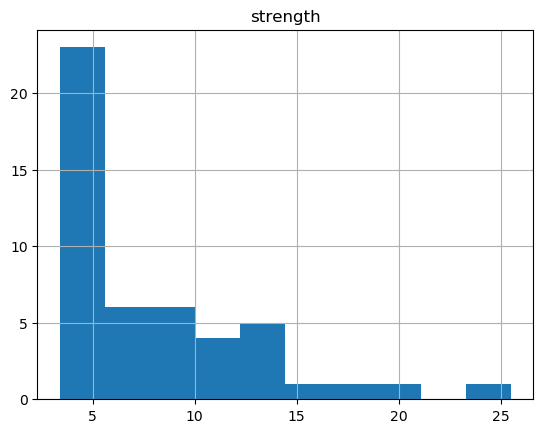

In [176]:
data = read_r('../data/devore7/xmp01.11.rda')
df = data['xmp01.11']

# a)
df.hist(bins=10)

# b)
abs_freq = df['strength'].value_counts(bins=10) # creates pd.Series
rel_freq = df['strength'].value_counts(bins=10, normalize=True) # creates pd.Series

# Alternative 1
freq = pd.DataFrame() # create empty pd.DataFrame
freq['abs'] = abs_freq # add new pd.Series to pd.DataFrame
freq['rel'] = rel_freq

# Alternative 2
freq = pd.DataFrame({
    'abs': abs_freq,
    'rel': rel_freq
})

# c) cumulative frequencies
rel_cumsum = rel_freq.sort_index().cumsum()
freq['rel_cumsum'] = rel_cumsum

## 4) Plastic Rebars (cont.)

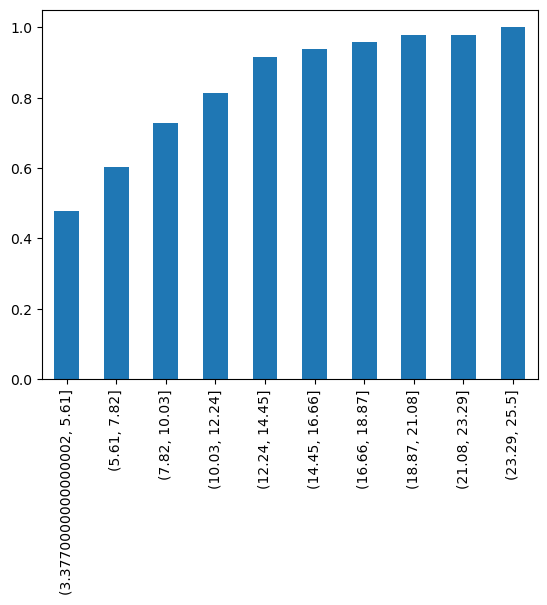

In [177]:
rel_cumsum.plot.bar(); None # <-- suppress output in Jupyter notebook

## 5) Electrical Power

The article “Determination of Most Representative Subdivision” (J. of Energy Engr., 1993: 43–55) gave data on various characteristics of subdivisions that could be used in deciding whether to provide electrical power using overhead lines or underground lines. Here are the values of the variable $x$: total length of streets within a subdivision: (Data: ex01.20)

1. Construct a histogram using class boundaries 0, 1000, 2000, 3000, 4000, 5000, and 6000. What proportion of subdivisions have total length less than 2000? Between 2000 and 4000? How would you describe the shape of the histogram?
2. Determine absolute cumulative frequencies and relative cumulative frequencies.
3. Plot the empirical cumulative distribution function.
4. The article also gave the following values of the variables $y$ = number of culs-de-sac and $z$ = number of intersections. (Data: ex01.21) Construct a bar plot for the $y$ data. What proportion of these subdivisions had no culs-de-sac? At least one cul-de-sac?
5. Construct a bar plot for the z data. What proportion of these subdivisions had at most five intersections? Fewer than five intersections?

In [178]:
data = read_r('../data/devore7/ex01.20.rda')
df = data['ex01.20'].rename(columns={'C1':'x'})

## 5) Electrical Power (cont.)

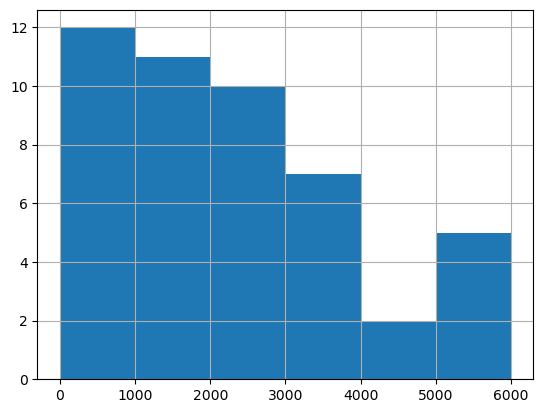

In [179]:

bins = [x*1000 for x in range(0, 7)]
df['x'].hist(bins=bins); None # <-- suppress output in Jupyter notebook

## 5) Electrical Power (cont.)

In [180]:
freq = pd.DataFrame({
    'abs': df['x'].value_counts(bins=bins),
    'rel': df['x'].value_counts(bins=bins, normalize=True),
})
cumsum = freq.sort_index().cumsum()
cumsum

,abs,rel
"(-0.001, 1000.0]",13,0.276596
"(1000.0, 2000.0]",23,0.489362
"(2000.0, 3000.0]",33,0.702128
"(3000.0, 4000.0]",40,0.851064
"(4000.0, 5000.0]",42,0.893617
"(5000.0, 6000.0]",47,1.000000


## 5) Electrical Power (cont.)

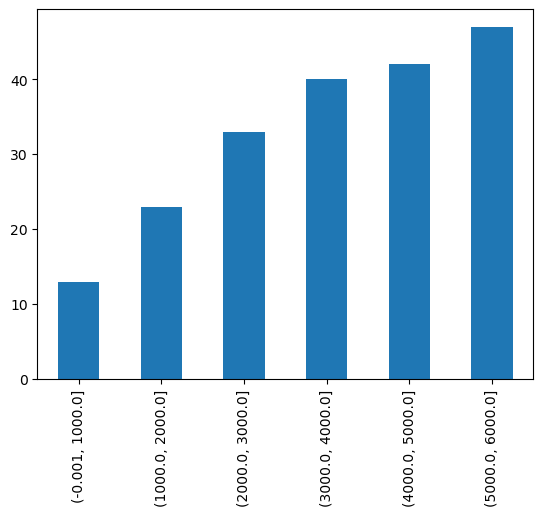

In [181]:
cumsum['abs'].plot.bar(); None # <-- suppress output in Jupyter notebook

## 5) Electrical Power (cont.)

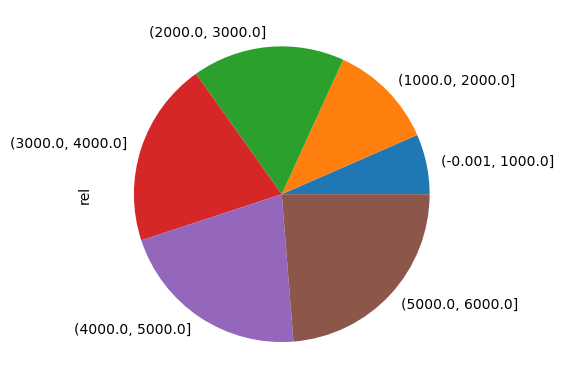

In [182]:
cumsum['rel'].plot.pie(); None # <-- suppress output in Jupyter notebook

## 5) Electrical Power (cont.)

In [183]:
data = read_r('../data/devore7/ex01.21.rda')
df = df.join(data['ex01.21'])
df.head()

,x,y,z
rownames,,,
1,1280,1,1
2,1050,0,8
3,1320,1,6
4,960,0,1
5,3150,0,1


## 5) Electrical Power (cont.)

Construct a bar plot for the $y$ data.

What proportion of these subdivisions had no culs-de-sac? At least one cul-de-sac?

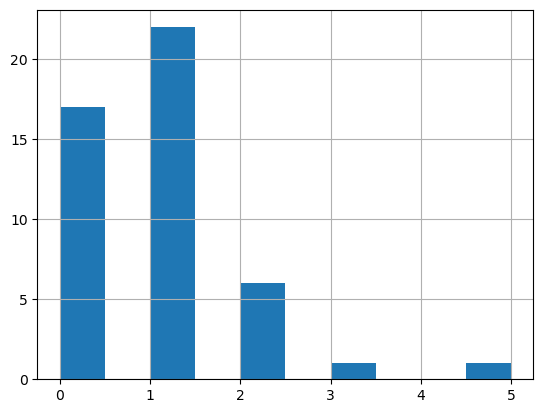

In [184]:
df['y'].hist(); None # <-- suppress output in Jupyter notebook

## 5) Electrical Power (cont.)

Construct a bar plot for the z data.

What proportion of these subdivisions had at most five intersections? Fewer than five intersections?

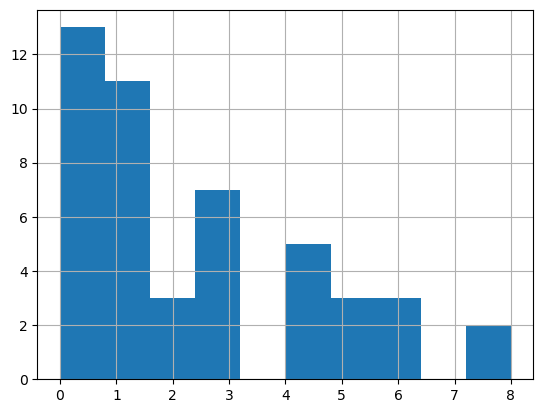

In [185]:
df['z'].hist(); None # <-- suppress output in Jupyter notebook

## 6) Wood

The accompanying specific gravity values for various wood types used in construction appeared in the article “Bolted Connection Design Values Based on European Yield Model” (J. of Structural Engr., 1993: 2169–2186). (Data: ex01.12)

1. Construct a histogram using class boundaries 0.3, 0.4, 0.5, 0.6, 0.7, and 0.8 .
2. Determine absolute frequencies and relative frequencies.
3. Determine absolute cumulative frequencies and relative cumulative frequencies.

In [186]:
data = read_r('../data/devore7/ex01.12.rda')
df = data['ex01.12']

## 6) Wood (cont.)

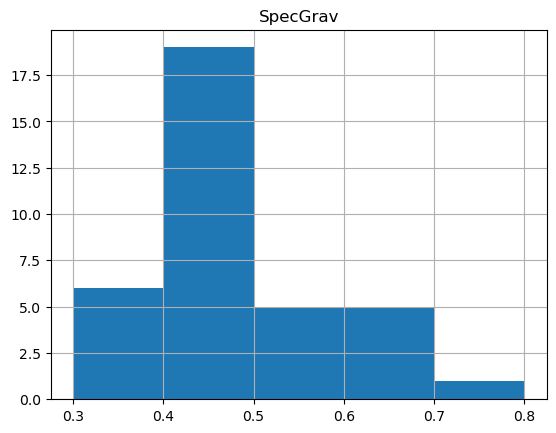

In [187]:

bins = [.3, .4, .5, .6, .7, .8]
df.hist(bins=bins); None # <-- suppress output in Jupyter notebook

## 6) Wood (cont.)

In [188]:
freq = pd.DataFrame({
    'abs': df['SpecGrav'].value_counts(bins=bins),
    'rel': df['SpecGrav'].value_counts(bins=bins, normalize=True),
}).sort_index()
freq

,abs,rel
"(0.299, 0.4]",9,0.250000
"(0.4, 0.5]",16,0.444444
"(0.5, 0.6]",5,0.138889
"(0.6, 0.7]",5,0.138889
"(0.7, 0.8]",1,0.027778


## 6) Wood (cont.)

In [189]:
freq.cumsum()

,abs,rel
"(0.299, 0.4]",9,0.250000
"(0.4, 0.5]",25,0.694444
"(0.5, 0.6]",30,0.833333
"(0.6, 0.7]",35,0.972222
"(0.7, 0.8]",36,1.000000


## 7) Work Stress and Pesticide Exposure

Consider the following data on types of health complaint 
(J =  joint swelling, F = fatigue, B = back pain, M = muscle weakness, C = coughing, N = nose running/irritation, O = other) made by tree planters. Obtain absolute frequencies and relative frequencies for the various categories, and draw a bar plot and a pie chart. (The data is consistent with percentages given in the article “Physiological Effects of Work Stress and Pesticide Exposure in Tree Planting by British Columbia Silviculture Workers,” Ergonomics, 1993: 951–961.) (Data: ex01.29)

## 8) Alclad

The accompanying data set consists of observations on shear strength (lb) of ultrasonic spot welds made on a certain type of alclad sheet. Construct a relative frequency histogram based on ten equal-width classes with boundaries 4000, 4200, …
Calculate the relative cumulative frequencies.
[The histogram will agree with the one in “Comparison of Properties of Joints Prepared by Ultrasonic Welding and Other Means” (J. of Aircraft, 1983: 552–556).] Comment on its features. (Data: ex01.24)

## 9) Cell Interdivision Time

A transformation of data values by means of some mathematical function, such as log(x), or 1/x, can often yield a set of numbers that has “nicer” statistical properties than the original data. In particular, it may be possible to find a function for which the histogram of transformed values is more symmetric (or, even better, more like a bell-shaped curve) than the original data. As an example, the article “Time Lapse Cinematographic Analysis of Beryllium–Lung Fibroblast Interactions” (Environ. Research, 1983: 34–43) reported the results of experiments designed to study the behavior of certain individual cells that had been exposed to beryllium. An important characteristic of such an individual cell is its interdivision time (IDT). IDTs were determined for a large number of cells, both in exposed (treatment) and unexposed (control) conditions. The authors of the article used a logarithmic transformation, that is, transformed value = log(original value) (Data: ex01.25)

Use class intervals 10, 20, 20, 30 … to construct a histogram of the original data. Use intervals 1.1, 1.2, 1.3 … to do the same for the transformed data. What is the effect of the transformation?